This code is used to reconstruct the results in Figure 4, where the authors want to create a small perturbation with n_dec = 1, using κ = 1, and λ = 0.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import optimal_velocity, initialize, euler_step, euler_step_normal, optimal_velocity_normal, plot_fundamental_diagram

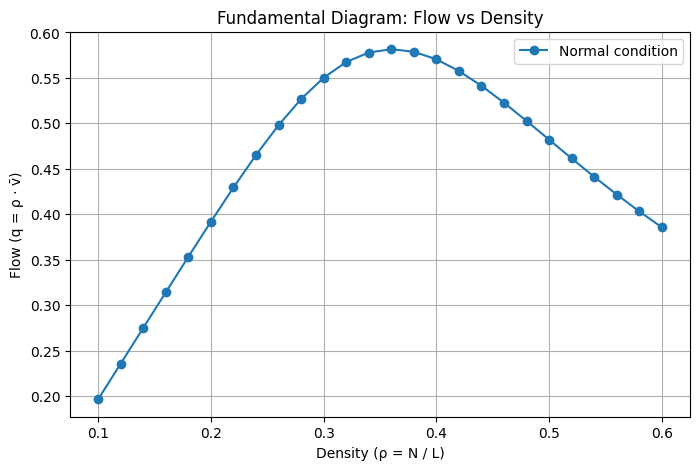

In [2]:
L = 500
simulation_time = 1000
dt = 0.1
steps = int(simulation_time / dt)
warmup = steps - 200
kappa = 1.0
lambda_ = 0.2
noise_amplitude = 0
N_values = np.arange(50, 301, 10)
densities = N_values / L
flows = []

for N in N_values:
    v0 = optimal_velocity_normal(L/N)
    x, v = initialize(N, L, v0)
    velocities = []

    for t in range(steps):
        x, v = euler_step_normal(x, v, kappa, lambda_, dt, L, noise_amplitude, t=t)
        if t >= warmup:
            velocities.append(v.copy())

    velocities = np.array(velocities)
    v_mean = velocities.mean()
    flow = (N / L) * v_mean
    flows.append(flow)

plt.figure(figsize=(8, 5))
plt.plot(densities, flows, 'o-', label='Normal condition')
plt.xlabel("Density (ρ = N / L)")
plt.ylabel("Flow (q = ρ · v̄)")
plt.title("Fundamental Diagram: Flow vs Density")
plt.grid(True)
plt.legend()
plt.show()

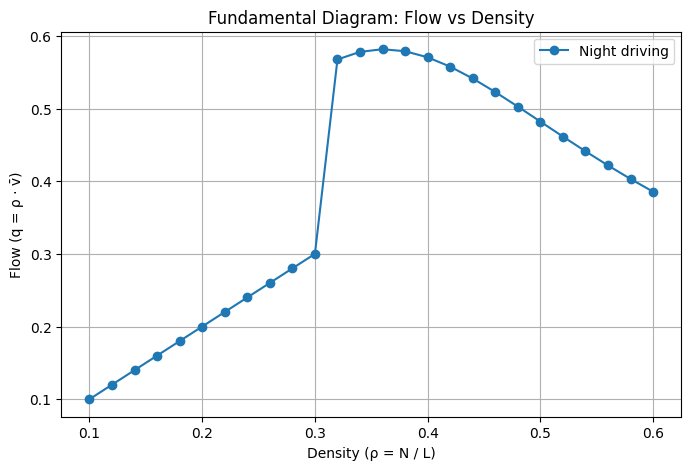

In [3]:
L = 500
simulation_time = 1000
dt = 0.1
steps = int(simulation_time / dt)
warmup = steps - 200
kappa = 1.0
lambda_ = 0.2
noise_amplitude = 0
N_values = np.arange(50, 301, 10)
densities = N_values / L
flows = []

for N in N_values:
    v0 = optimal_velocity(L/N)
    x, v = initialize(N, L, v0)
    velocities = []

    for t in range(steps):
        x, v = euler_step(x, v, kappa, lambda_, dt, L, noise_amplitude, t=t)
        if t >= warmup:
            velocities.append(v.copy())

    velocities = np.array(velocities)
    v_mean = velocities.mean()
    flow = (N / L) * v_mean
    flows.append(flow)

plt.figure(figsize=(8, 5))
plt.plot(densities, flows, 'o-', label='Night driving')
plt.xlabel("Density (ρ = N / L)")
plt.ylabel("Flow (q = ρ · v̄)")
plt.title("Fundamental Diagram: Flow vs Density")
plt.grid(True)
plt.legend()
plt.show()

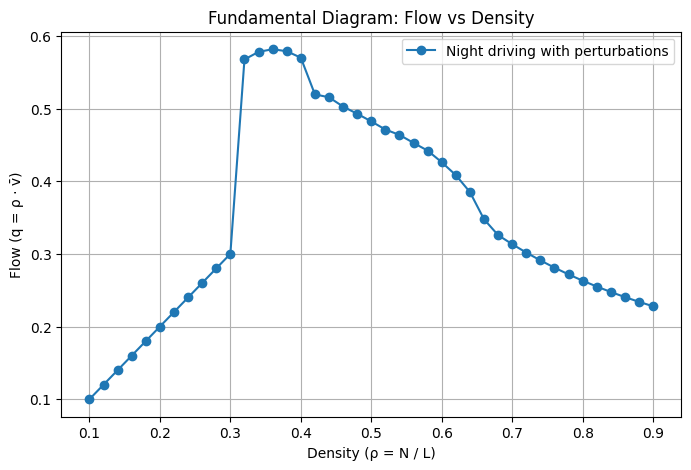

In [4]:
plot_fundamental_diagram(kappa=1, lambda_=0.2, n_dec=1);